In [2]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [ ]:
# import like this
items_path = "/content/drive/MyDrive/Classroom/items.csv"
q1_path = "/content/drive/MyDrive/Classroom/quarter-1.csv"
q2_path = "/content/drive/MyDrive/Classroom/quarter-2.csv"
q3_path = "/content/drive/MyDrive/Classroom/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

In [ ]:
items.sample(5)

,item_id,item_name
27,27,Barbacoa Crispy Tacos
21,21,Steak Bowl
16,16,Bottled Water
6,6,Steak Burrito
42,42,Chips and Mild Fresh Tomato Salsa


In [ ]:
q1.sample(5)

,order_id,quantity,item_id,choice_description_id,item_price
596,485,1,18,430,$8.99
2057,1657,1,33,268,$1.25
2115,1699,1,11,51,$8.75
1162,951,1,11,414,$11.25
1686,1365,1,11,877,$8.75


In [ ]:
q3

,order_id,quantity,item_id,choice_description_id,item_price


In [ ]:
q2.sample(5)

,order_id,quantity,item_id,choice_description_id,item_price
1714,1364,1,11,861,$11.25
1937,1550,2,12,36,$2.18
479,393,1,12,13,$1.09
2278,1786,4,33,145,$5.00
1284,1001,1,6,217,$8.99


###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [ ]:
#1
combdf=pd.concat([q1,q2,q3],ignore_index=True)
combdf

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75
...,...,...,...,...,...
4617,1829,1,23,92,$11.25
4618,1830,1,23,1043,$11.25
4619,1832,1,10,116,$8.75
4620,1832,1,8,0,$4.45


In [ ]:
#2
multicombdf=pd.concat([q1,q2,q3],keys=["q1","q2","q3"])
multicombdf


order_id quantity item_id choice_description_id item_price
q1 0           1        1       1                     1     $3.39 
   1           1        1       2                     2     $3.39 
   2           2        2       4                     3    $16.98 
   3           4        1       7                     6     $9.25 
   4           6        1       9                     8     $8.75 
...          ...      ...     ...                   ...        ...
q2 2342     1829        1      23                    92    $11.25 
   2343     1830        1      23                  1043    $11.25 
   2344     1832        1      10                   116     $8.75 
   2345     1832        1       8                     0     $4.45 
   2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [ ]:
#3
print("most sold item of q1:\t",items[items["item_id"]==(q1.groupby("item_id").size().sort_values(ascending=False).head(1).index.to_numpy()[0])]["item_name"].values)
print("most sold item of q2:\t",items[items["item_id"]==(q2.groupby("item_id").size().sort_values(ascending=False).head(1).index.to_numpy()[0])]["item_name"].values)
print("most sold item of q3:\t",items[items["item_id"]==(q3.groupby("item_id").size().sort_values(ascending=False).head(1).index.to_numpy()[0])]["item_name"])

most sold item of q1:	 ['Chicken Bowl']
most sold item of q2:	 ['Chicken Bowl']


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
#4
q1["item_price"]=q1["item_price"].str.strip("$").astype(float)
q2["item_price"]=q2["item_price"].str.strip("$").astype(float)

In [ ]:
print("item generation most revenue in q1: ",items[items['item_id']==q1.groupby("item_id")['item_price'].sum().sort_values(ascending=False).head(1).index.to_numpy()[0]]["item_name"].values)
print("item generation most revenue in q2: ",items[items['item_id']==q2.groupby("item_id")['item_price'].sum().sort_values(ascending=False).head(1).index.to_numpy()[0]]["item_name"].values)

item generation most revenue in q1:  ['Chicken Bowl']
item generation most revenue in q2:  ['Chicken Bowl']


In [ ]:
#5
print(q1.groupby("order_id")["item_price"].sum().mean())
print(q2.groupby("order_id")["item_price"].sum().mean())

NameError: name 'q1' is not defined

In [3]:
ipl_matches=pd.read_csv("/content/IPL_Matches_2008_2022.csv")
ipl_del=pd.read_csv("/content/ipl_deliveries.csv")


print(ipl_matches.head())
(ipl_del.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Rajasthan RoyalsGujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,1312200,Rajasthan RoyalsGujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,1312200,Rajasthan RoyalsGujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [4]:
print(ipl_matches.columns)
print(ipl_del.columns)


Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')
Index(['ID', 'Team', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'BowlingTeam'],
      dtype='object')


In [5]:
ipl_merged=ipl_del.merge(ipl_matches[["ID","Season"]],on="ID")
ipl_merged.head()

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,Season
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans,2022
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans,2022
2,1312200,Rajasthan RoyalsGujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans,2022
3,1312200,Rajasthan RoyalsGujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans,2022
4,1312200,Rajasthan RoyalsGujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans,2022


###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [7]:
bowler_stats

Wickets  RunsConceded
bowler         Season                       
A Ashish Reddy 2012         11           238
               2013          3            71
               2015          4            51
               2016          1            40
A Badoni       2022          2            12
...                        ...           ...
Z Khan         2013          5            47
               2014          6           156
               2015          8           159
               2016         12           341
               2017         12           323

[1673 rows x 2 columns]

In [8]:
total_balls_bowled

bowler          Season
A Ashish Reddy  2012      163
                2013       40
                2015       36
                2016       23
A Badoni        2022       12
                         ... 
Z Khan          2013       36
                2014      134
                2015      145
                2016      262
                2017      241
Name: BallsBowled, Length: 1673, dtype: int64

In [9]:
pd.concat([bowler_stats,total_balls_bowled],axis=1).fillna(0)

Wickets  RunsConceded  BallsBowled
bowler         Season                                    
A Ashish Reddy 2012         11           238          163
               2013          3            71           40
               2015          4            51           36
               2016          1            40           23
A Badoni       2022          2            12           12
...                        ...           ...          ...
Z Khan         2013          5            47           36
               2014          6           156          134
               2015          8           159          145
               2016         12           341          262
               2017         12           323          241

[1673 rows x 3 columns]

In [6]:
bowler_groups=ipl_merged.groupby(["bowler","Season"])
bowler_stats=bowler_groups.agg(Wickets=("isWicketDelivery","sum"),RunsConceded=("total_run","sum"))

valid_balls_df=ipl_merged[~ipl_merged['extra_type'].isin(["wides","noballs","penalty"])]
total_balls_bowled=valid_balls_df.groupby(["bowler","Season"]).size().rename("BallsBowled")
full_stats=pd.concat([bowler_stats,total_balls_bowled],axis=1).fillna(0)
full_stats["Economy"]=np.where(full_stats["BallsBowled"]>0,(full_stats["RunsConceded"]/full_stats["BallsBowled"])*6,np.inf)
full_stats.reset_index().sort_values(by=["Season","Wickets","Economy"],ascending=[False,False,True]).drop_duplicates("Season",keep="first")

,bowler,Season,Wickets,RunsConceded,BallsBowled,Economy
1651,YS Chahal,2022,29,536,408,7.882353
500,HV Patel,2021,35,461,338,8.183432
702,K Rabada,2020/21,32,565,398,8.517588
701,K Rabada,2019,29,382,288,7.958333
122,AJ Tye,2018,28,459,336,8.196429
221,B Kumar,2017,28,384,314,7.337580
220,B Kumar,2016,24,503,396,7.621212
361,DJ Bravo,2015,28,442,314,8.445860
924,MM Sharma,2014,26,457,323,8.489164
360,DJ Bravo,2013,34,505,375,8.080000


In [10]:
#direct less accurate way without tie braker or accounting for invalid balls.
ipl_merged.groupby(["bowler","Season"])["isWicketDelivery"].sum().reset_index().sort_values(["Season","isWicketDelivery"],ascending=False).drop_duplicates("Season",keep="first")

,bowler,Season,isWicketDelivery
1651,YS Chahal,2022,29
500,HV Patel,2021,35
702,K Rabada,2020/21,32
701,K Rabada,2019,29
122,AJ Tye,2018,28
221,B Kumar,2017,28
220,B Kumar,2016,24
361,DJ Bravo,2015,28
924,MM Sharma,2014,26
360,DJ Bravo,2013,34


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [12]:
total_balls_bowled_do

bowler          Season
A Ashish Reddy  2012       73
                2013       10
                2015       18
A Chandila      2013        6
A Choudhary     2017       24
                         ... 
Z Khan          2012      138
                2014       32
                2015       36
                2016       63
                2017       30
Name: total_balls, Length: 1295, dtype: int64

In [13]:
dob_stats

wickets  runs_conceded
bowler         Season                        
A Ashish Reddy 2012          8            124
               2013          1             25
               2015          2             20
A Chandila     2013          0              6
A Choudhary    2017          1             40
...                        ...            ...
Z Khan         2012         13            203
               2014          1             47
               2015          2             59
               2016          4            118
               2017          3             65

[1296 rows x 2 columns]

In [11]:
#bowler_groups[bowler_groups["overs"]>14]["isWicketDelivery"].sum()
#must filter a df before merging.
dob_groups=ipl_merged[ipl_merged['overs']>=15].groupby(["bowler","Season"])
total_balls_bowled_do=ipl_merged[(ipl_merged["overs"]>=15) & (~ipl_merged["extra_type"].isin(["wides","noballs","penalty"]))].groupby(["bowler","Season"]).size().rename("total_balls")
dob_stats=dob_groups.agg(wickets=("isWicketDelivery","sum"),runs_conceded=("total_run","sum"))
fin_dob=pd.concat([dob_stats,total_balls_bowled_do],axis=1).fillna(0)
fin_dob["economy"]=np.where(fin_dob["total_balls"]>0,fin_dob['runs_conceded']/fin_dob["total_balls"]*6,np.inf)
fin_dob.reset_index().sort_values(by=["Season","wickets","economy"],ascending=[False,False,True]).drop_duplicates("Season",keep="first")

,bowler,Season,wickets,runs_conceded,total_balls,economy
1278,YS Chahal,2022,14,157,108.0,8.722222
384,HV Patel,2021,24,243,158.0,9.227848
541,K Rabada,2020/21,20,216,142.0,9.126761
540,K Rabada,2019,21,205,138.0,8.913043
101,AJ Tye,2018,16,201,138.0,8.739130
168,B Kumar,2017,19,204,146.0,8.383562
1113,SR Watson,2016,16,247,135.0,10.977778
276,DJ Bravo,2015,24,303,206.0,8.825243
721,MM Sharma,2014,16,215,125.0,10.320000
275,DJ Bravo,2013,25,286,219.0,7.835616


In [14]:
ipl_del.sample()

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
136266,598053,Pune WarriorsKolkata Knight Riders,2,3,1,RV Uthappa,L Balaji,Yuvraj Singh,NaN,0,0,0,0,0,NaN,NaN,NaN,Pune Warriors,Kolkata Knight Riders


In [15]:
ipl_matches.sample()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
140,1216530,NaN,2020-11-01,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [16]:
def batter_info(bn):
  batter_df=ipl_merged[ipl_merged['batter']==bn]
  batter_group=batter_df.groupby("Season")

  innings=batter_group["ID"].nunique().rename("Innings")


  total_runs=batter_group["batsman_run"].sum().rename("TotalRuns")
  out_times=ipl_merged[ipl_merged["player_out"]==bn].groupby("Season").size().rename("OutTimes")

  balls_faced=batter_df[batter_df['extra_type']!="wide"].groupby("Season").size().rename("BallsFaced")

  avg=(total_runs/out_times).rename("Avg")
  strike_rate=(total_runs/balls_faced*100).rename("StrikeRate")

  scores_per_match=batter_df.groupby(["Season","ID"])["batsman_run"].sum()
  highest_scores=scores_per_match.groupby("Season").max().rename("HighestScores")

  final_df=pd.concat([innings,total_runs,avg,strike_rate,highest_scores],axis=1)
  return final_df

In [17]:
batter_info("V Kohli")

,Innings,TotalRuns,Avg,StrikeRate,HighestScores
Season,,,,,
2007/08,12,165,15.000000,98.214286,38
2009,13,246,22.363636,109.333333,50
2009/10,13,307,27.909091,142.129630,58
2011,16,557,46.416667,117.758985,71
2012,15,364,28.000000,109.309309,73
2013,16,639,45.642857,135.668790,99
2014,14,359,27.615385,119.269103,73
2015,16,505,45.909091,127.848101,82
2016,16,973,81.083333,148.549618,113


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [18]:
ipl_merged=ipl_del.merge(ipl_matches,on="ID")

In [55]:
#building logic
"""id=1216530
batting_time=ipl_merged[(ipl_merged["ID"]==id)&(ipl_merged["batter"]==ipl_merged["Player_of_Match"])]
bowling_time=ipl_merged[(ipl_merged["ID"]==id)&(ipl_merged["bowler"]==ipl_merged["Player_of_Match"])]
total_runs=batting_time["batsman_run"].sum()
total_balls=batting_time["batsman_run"].size-(batting_time["extra_type"]=="wides").sum()
total_wickets=bowling_time['isWicketDelivery'].sum()
total_runs_conceded=bowling_time["total_run"].sum()
"""


np.int64(11)

In [61]:
pom_batting_df=ipl_merged[ipl_merged["batter"]==ipl_merged["Player_of_Match"]]
pom_bowling_df=ipl_merged[ipl_merged["bowler"]==ipl_merged["Player_of_Match"]]
pom=ipl_matches.drop_duplicates(subset="ID").set_index("ID")["Player_of_Match"].rename("Player_of_the_Match")

pom_batting_group=pom_batting_df.groupby("ID")
pom_bowling_group=pom_bowling_df.groupby("ID")

total_runs=pom_batting_group["batsman_run"].sum()
total_balls=(pom_batting_group["batsman_run"].size())-(pom_batting_group.apply(lambda x: (x["extra_type"]=="wides").sum()))
batting_figure=(total_runs.astype(str) + "/" + total_balls.astype(str)).rename("batting_figure")
batting_figure

total_wickets=pom_bowling_group["isWicketDelivery"].sum()
total_runs_conceded=pom_bowling_group["total_run"].sum()
bowling_figure=(total_wickets.astype(str) + "/" + total_runs_conceded.astype(str)).rename("bowling_figure")

out_df=pd.concat([pom,batting_figure,bowling_figure],axis=1)
out_df


/tmp/ipython-input-3905828980.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_balls=(pom_batting_group["batsman_run"].size())-(pom_batting_group.apply(lambda x: (x["extra_type"]=="wides").sum()))


,Player_of_the_Match,batting_figure,bowling_figure
ID,,,
1312200,HH Pandya,34/30,3/18
1312199,JC Buttler,106/60,NaN
1312198,RM Patidar,112/54,NaN
1312197,DA Miller,68/38,NaN
1304116,Harpreet Brar,NaN,3/26
...,...,...,...
335986,DJ Hussey,38/43,1/35
335985,MV Boucher,39/19,NaN
335984,MF Maharoof,NaN,2/14


In [66]:
#to remove the warning
pom_batting_df=ipl_merged[ipl_merged["batter"]==ipl_merged["Player_of_Match"]]
pom_bowling_df=ipl_merged[ipl_merged["bowler"]==ipl_merged["Player_of_Match"]]
pom=ipl_matches.drop_duplicates(subset="ID").set_index("ID")["Player_of_Match"].rename("Player_of_the_Match")

pom_batting_group=pom_batting_df.groupby("ID")
pom_bowling_group=pom_bowling_df.groupby("ID")

total_runs=pom_batting_group["batsman_run"].sum()
total_balls=(pom_batting_group.size()).sub((pom_batting_df[pom_batting_df['extra_type']=="wides"]).groupby("ID").size(),fill_value=0).astype(int)
batting_figure=(total_runs.astype(str) + "/" + total_balls.astype(str)).rename("batting_figure")
batting_figure

total_wickets=pom_bowling_group["isWicketDelivery"].sum()
total_runs_conceded=pom_bowling_group["total_run"].sum()
bowling_figure=(total_wickets.astype(str) + "/" + total_runs_conceded.astype(str)).rename("bowling_figure")

out_df=pd.concat([pom,batting_figure,bowling_figure],axis=1)
out_df


,Player_of_the_Match,batting_figure,bowling_figure
ID,,,
1312200,HH Pandya,34/30,3/18
1312199,JC Buttler,106/60,NaN
1312198,RM Patidar,112/54,NaN
1312197,DA Miller,68/38,NaN
1304116,Harpreet Brar,NaN,3/26
...,...,...,...
335986,DJ Hussey,38/43,1/35
335985,MV Boucher,39/19,NaN
335984,MF Maharoof,NaN,2/14


In [19]:
#last line already logically wrong.
#will need to seperate them again inside the apply function.
'''mask=(ipl_merged["batter"]==ipl_merged["Player_of_Match"])|(ipl_merged["bowler"]==ipl_merged["Player_of_Match"])
match_groups=ipl_merged[mask].groupby("ID")

PlayerOfMatch=match_groups["Player_of_Match"]
runs=match_groups["batsman_run"].sum()'''

## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [67]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<Axes: >

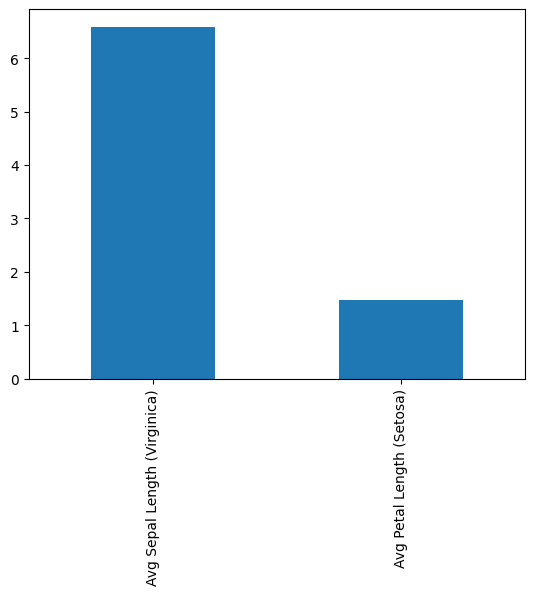

In [68]:
setosa_full=setosa.merge(sepal_all).merge(petal_all)
virginica_full=virginica.merge(sepal_all).merge(petal_all)
avg_sl_virginica=virginica_full['SepalLengthCm'].mean()
avg_pl_setosa=setosa_full['PetalLengthCm'].mean()
pd.Series([avg_sl_virginica, avg_pl_setosa],index=['Avg Sepal Length (Virginica)', 'Avg Petal Length (Setosa)']).plot(kind="bar")



### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [69]:
versicolor_full=versicolor.merge(sepal_all).merge(petal_all)
full_df=pd.concat([setosa_full,versicolor_full,virginica_full])
full_df=full_df.drop("Unnamed: 0",axis=1).sample(frac=1)
full_df


,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,15,Iris-setosa,5.8,4.0,1.2,0.2
23,74,Iris-versicolor,6.1,2.8,4.7,1.2
25,76,Iris-versicolor,6.6,3.0,4.4,1.4
4,105,Iris-virginica,6.5,3.0,5.8,2.2
17,118,Iris-virginica,7.7,3.8,6.7,2.2
...,...,...,...,...,...,...
5,56,Iris-versicolor,5.7,2.8,4.5,1.3
41,42,Iris-setosa,4.5,2.3,1.3,0.3
4,5,Iris-setosa,5.0,3.6,1.4,0.2
26,127,Iris-virginica,6.2,2.8,4.8,1.8


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [83]:
full_df.groupby("Species").agg({"SepalWidthCm":["min","max"],"PetalWidthCm":["min","max"]}).loc[["Iris-setosa","Iris-versicolor"]]

SepalWidthCm      PetalWidthCm     
                         min  max          min  max
Species                                            
Iris-setosa              2.3  4.4          0.1  0.6
Iris-versicolor          2.0  3.4          1.0  1.8